## Analysis of the Oscars

/home/adrien/anaconda3/envs/epfl-ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


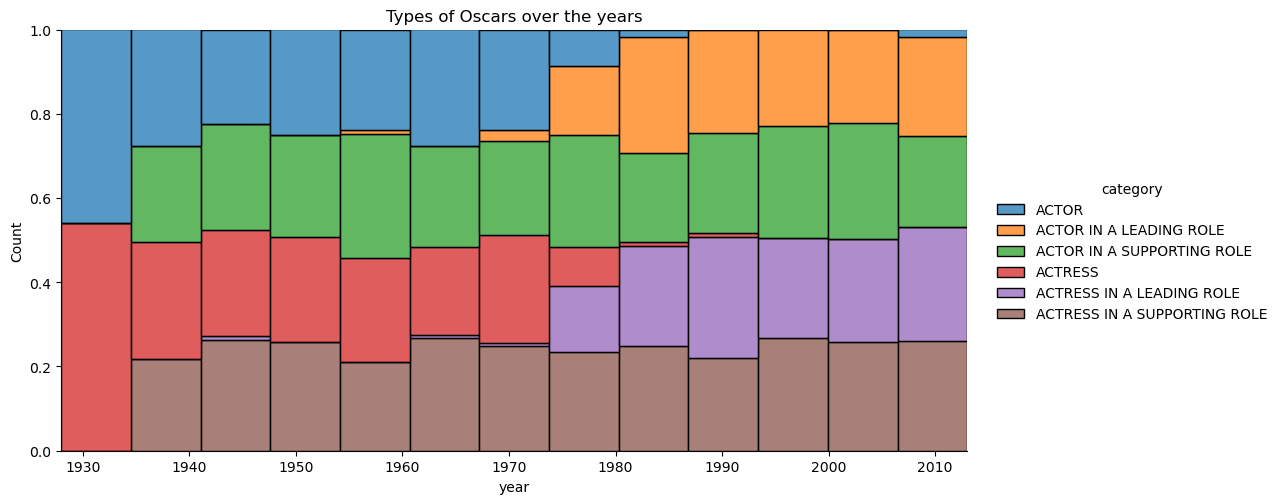

In [40]:
# Evolution of the types of Oscars given over the years
data = []

for cats in actors_oscars['category']:
    for film_id in cats:
        cat = cats[film_id]
        if cat[:3] == "ACT":
            movie = movies_load.query("fbID == '" + film_id + "'")
            year = movie["releaseYear"].values[0]
            data.append([year, cat])

data = pd.DataFrame(data, columns=["year", "category"])

sns.displot(
    data,
    x="year",
    hue="category",
    multiple="fill",
    hue_order=["ACTOR", "ACTOR IN A LEADING ROLE", "ACTOR IN A SUPPORTING ROLE", "ACTRESS", "ACTRESS IN A LEADING ROLE", "ACTRESS IN A SUPPORTING ROLE"],
    aspect=2,
)
plt.title("Types of Oscars over the years")
plt.show()

To better understand the different types of Oscars that can be given to an actor, we plotted the evolution of the categories of Oscars given over the time. An actor, an actress, can receive an Oscar for their performance either in a leading role or in a supporting role. This fact and the plot suggest that the values `ACTOR` / `ACTRESS` and `ACTOR IN A LEADING ROLE` / `ACTRESS IN A LEADING ROLE` actually represent the same type of oscar.

<Axes: title={'center': 'Number of Oscars nominees per year'}, xlabel='Year', ylabel='Number of oscars'>

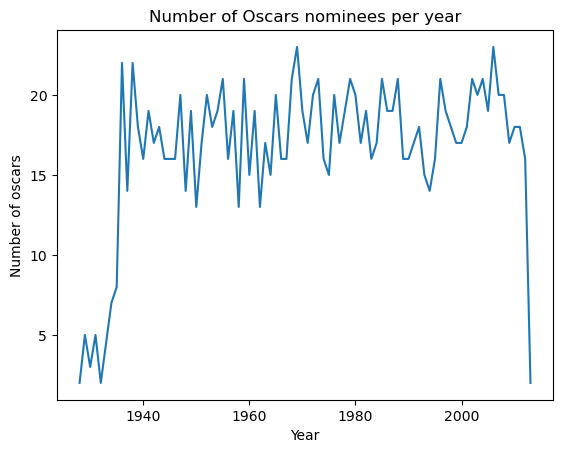

In [41]:
# Find the number of oscars given per year
years = []
for cats in actors_oscars['category']:
    for film_id in cats:
        movie = movies_load.query("fbID == '" + film_id + "'")
        year = movie["releaseYear"].values[0]
        years.append(year)

years = pd.Series(years).value_counts()
years.sort_index().plot(kind='line', linestyle='-', xlabel="Year", ylabel="Number of oscars", title="Number of Oscars nominees per year")

We can see that the number of Oscar nominees is rather constant over the years.

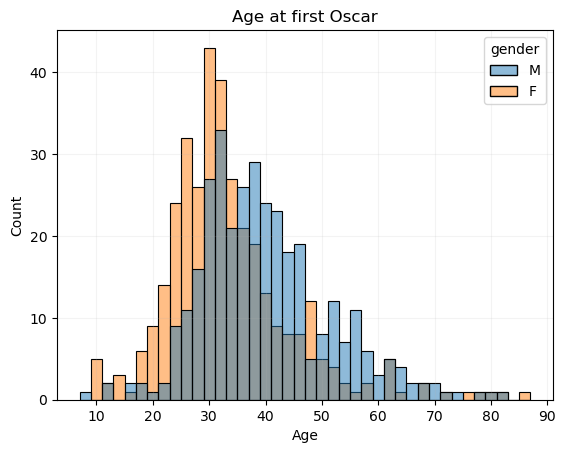

In [42]:
ages_at_first_oscar_nomination = []

for _, actor in actors_load.iterrows():
    min_age = 1000

    if type(actor["category"]) == float: # Ignore NaN
        continue

    for film_id in actor["category"]:
        try:
            if type(actor["ageAtMovieRelease"]) != float:
                age = actor["ageAtMovieRelease"][film_id]
                min_age = min(age, min_age)
        except KeyError:
            pass

    if min_age != 1000:
        ages_at_first_oscar_nomination.append([min_age, actor["actorGender"]])

ages_at_first_oscar_nomination = pd.DataFrame(ages_at_first_oscar_nomination, columns=["age", "gender"])

sns.histplot(ages_at_first_oscar_nomination, x="age", hue="gender", hue_order=["M", "F"], bins=40)
plt.title("Age at first Oscar")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(alpha=0.15)
plt.show()

A person can obtain their first Oscar at any point of their life, but most obtain it between 30 years old and 50 years old. It is interesting to note that women tend to obtain it earlier than men.

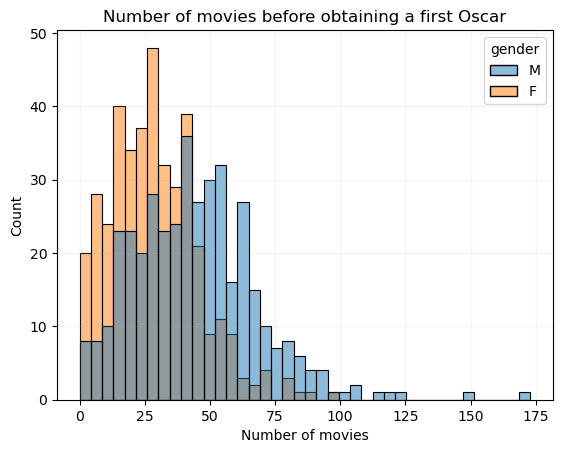

In [43]:
nb_films_at_first_oscar_nomination = []

for _, actor in actors_load.iterrows():
    if type(actor["category"]) == float: # Ignore NaN
        continue

    oscar_years = []

    for film_id in actor["category"]:
        movie = movies_load.query("fbID == '" + film_id + "'")
        year = movie["releaseYear"].values[0]
        oscar_years.append(year)
    
    if len(oscar_years) == 0:
        continue

    first_oscar_year = min(oscar_years)

    count = 0

    for movie_id in actor.fbID:
        movie = movies_load.query("fbID == '" + film_id + "'")
        year = movie["releaseYear"].values[0]

        if year >= first_oscar_year:
            count += 1
    
    nb_films_at_first_oscar_nomination.append([count, actor.actorGender])

nb_films_at_first_oscar_nomination = pd.DataFrame(nb_films_at_first_oscar_nomination, columns=["count", "gender"])

sns.histplot(nb_films_at_first_oscar_nomination, x="count", hue="gender", hue_order=["M", "F"], bins=40)
plt.title("Number of movies before obtaining a first Oscar")
plt.xlabel("Number of movies")
plt.ylabel("Count")
plt.grid(alpha=0.15)
plt.show()